In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

Se genera el data set:

In [2]:
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

Se visualiza el dataset:

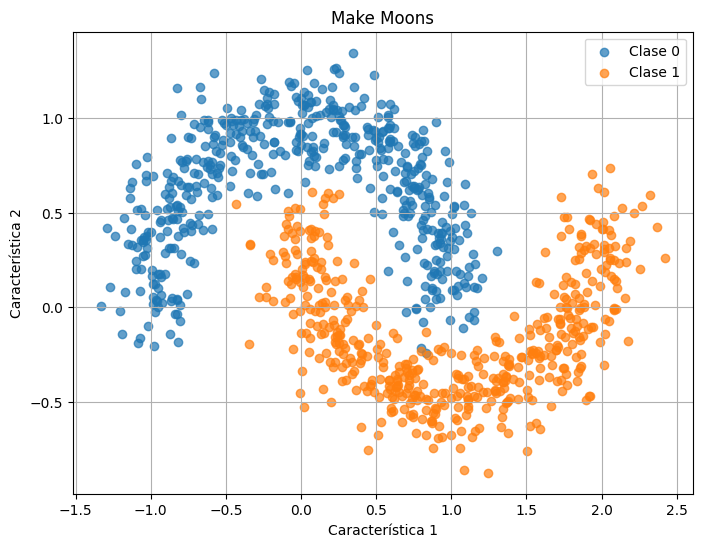

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Clase 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Clase 1', alpha=0.7)
plt.title('Make Moons')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

Se dividen los datos en entrenamiento y prueba:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se contruye el modelo la RN usando Keras:

In [5]:
model = keras.Sequential([
    layers.Input(shape=(2,)),  # La entrada tiene 2 características
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Salida para clasificación binaria
])

Se compila el modelo:

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo:

In [8]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6668 - loss: 0.6615 - val_accuracy: 0.8750 - val_loss: 0.5771
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8658 - loss: 0.5585 - val_accuracy: 0.8750 - val_loss: 0.4884
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8588 - loss: 0.4763 - val_accuracy: 0.8750 - val_loss: 0.4133
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8422 - loss: 0.4149 - val_accuracy: 0.8750 - val_loss: 0.3522
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8647 - loss: 0.3450 - val_accuracy: 0.8750 - val_loss: 0.3081
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8629 - loss: 0.3134 - val_accuracy: 0.8750 - val_loss: 0.2828
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.3012 - val_accuracy: 0.8750 - val_loss: 0.2656
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8709 - loss: 0.2830 - val_accuracy: 0.8875 - val_loss

In [9]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"Pérdida del modelo en el conjunto de prueba: {loss:.4f}")


Precisión del modelo en el conjunto de prueba: 1.0000
Pérdida del modelo en el conjunto de prueba: 0.0395


**Visualización**

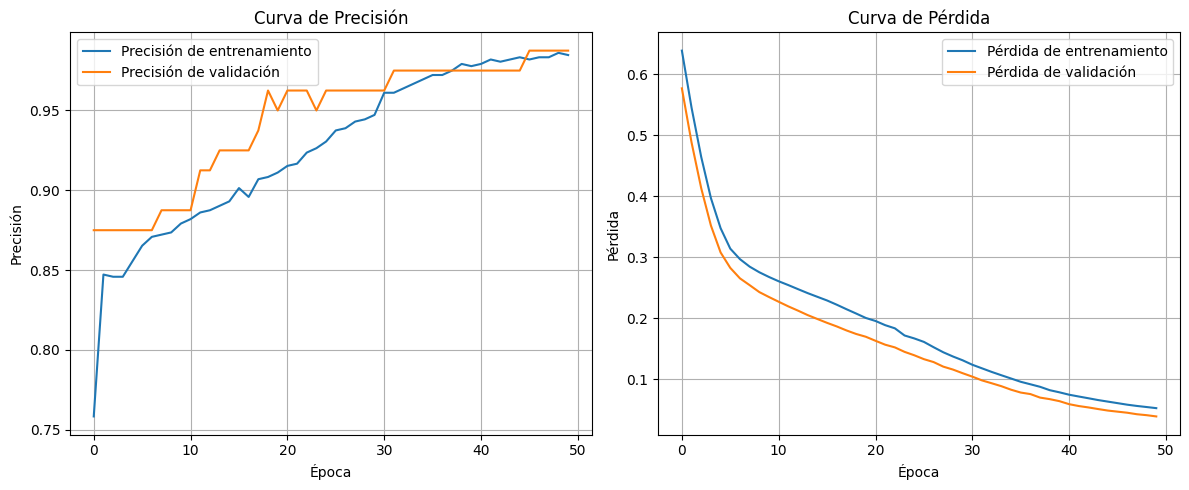

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

Se carga el dataset:

In [11]:
digits = load_digits()
X = digits.data
y = digits.target

Se dividen los datos en un conjunto de entrenamiento y prueba:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se define el número de clases:

In [13]:
num_classes = len(np.unique(y_train))

Se construye el modelo:

In [14]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

Se compila el modelo:

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se entrena el modelo:

In [16]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2743 - loss: 3.6996 - val_accuracy: 0.8194 - val_loss: 0.6288
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8809 - loss: 0.4299 - val_accuracy: 0.9062 - val_loss: 0.2973
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9379 - loss: 0.2134 - val_accuracy: 0.9375 - val_loss: 0.2011
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.1245 - val_accuracy: 0.9375 - val_loss: 0.1816
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.0885 - val_accuracy: 0.9583 - val_loss: 0.1536
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9799 - loss: 0.0872 - val_accuracy: 0.9340 - val_loss: 0.1502
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0563 - val_accuracy: 0.9549 - val_loss: 0.1402
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0375 - val_accuracy: 0.9479 - val_loss:

In [17]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"Pérdida del modelo en el conjunto de prueba: {loss:.4f}")


Precisión del modelo en el conjunto de prueba: 0.9722
Pérdida del modelo en el conjunto de prueba: 0.0894
